# <span style="color:#23edb7">Project Title :  Exploratory Analysis of Heart Disease UCI Dataset📊📈</span>


![heart](CVD.JPG)


Author: SS


# Introduction

Welcome to the `exploratory analysis of the Heart Disease UCI dataset` notebook! In this notebook, we will delve into the Heart Disease UCI dataset, which contains various clinical and demographic features of patients to predict the presence of heart disease. By exploring this dataset, we aim to gain insights into the factors that contribute to heart disease and develop a better understanding of the data.

# About Data
The UCI Heart Disease dataset contains a collection of features that are used to predict the presence of heart disease in patients. Each row in the dataset represents a different patient, and the columns represent various attributes related to their health and heart disease status.

# Dataset Features
    - Number of Instances/Patients: (The data is taken from 920 different patients)
    - Number of Attributes/Features: (There are 15 different features excluding the target variable i.e. presence of heart disease in the patient)
    - Target Variable: num (This indicates the presence of heart disease in the patient)

## Meta-Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type
  1. typical angina,
  2. atypical angina,
  3. non-anginal,
  4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objective:

We will fill this after doing some exploratory Data Analyis (EDA).

<a id="import"></a>
# <p style="background-color:#ef271a; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1| Import libraries </p>

⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.4 MB/s eta 0:00:00


In [ ]:
# Import Libraries
# 01.To handle the data
import pandas as pd
import numpy as np
# 02.To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 03. To preprocess the data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer,KNNImputer

# Import quantile transformer and pipeline
from sklearn.preprocessing import QuantileTransformer


# 04. import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 05. Machine Learning Models
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
# 07. For Regression task
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,RandomForestClassifier

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
# 07. Metrics for regression task
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
# Define Accuracy score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

from sklearn.pipeline import Pipeline


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 150

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')


In [ ]:
# print heading - for display purposes only
def heading(heading):
    print('-' * 50)
    print(heading)
    print('-' * 50)

<a id="import"></a>
# <p style="background-color:#f4f416; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2| LOAD Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
# Read the data
df = pd.read_csv("https://raw.githubusercontent.com/sijuswamy/Intel-Unnati-sessions/main/heart.csv")

<a id="import"></a>
# <p style="background-color:#f4f416; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3| DATASET Overview</p>

⬆️ [Tabel of Contents](#contents_tabel)

## Step 3.1 : Summarize the data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,920.0,53.510870,9.424685,28.0,47.0,54.0,60.0,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.0,130.0,140.0,200.0
chol,890.0,199.130337,110.780810,0.0,175.0,223.0,268.0,603.0
thalch,865.0,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.0,0.5,1.5,6.2
ca,309.0,0.676375,0.935653,0.0,0.0,0.0,1.0,3.0
target,920.0,0.995652,1.142693,0.0,0.0,1.0,2.0,4.0



*Observations from the Descriptive Statistics:*

1. For the 'mean' (average) values:
   - Age: [mean_age_value]
   - Resting Blood Pressure ('trestbps'): [mean_trestbps_value]
   - Cholesterol ('chol'): [mean_chol_value]
   - Maximum Heart Rate ('thalach'): [mean_thalach_value]
   - ST Depression induced by exercise ('oldpeak'): [mean_oldpeak_value]

2. For the 'standard deviation' values:
   - Age: [std_age_value]
   - Resting Blood Pressure ('trestbps'): [std_trestbps_value]
   - Cholesterol ('chol'): [std_chol_value]
   - Maximum Heart Rate ('thalach'): [std_thalach_value]
   - ST Depression induced by exercise ('oldpeak'): [std_oldpeak_value]

3. For other statistical measures such as 'min', '25%', '50%', '75%', and 'max':
   - Age: [min_age_value, 25th_percentile_age, median_age, 75th_percentile_age, max_age]
   - Resting Blood Pressure ('trestbps'): [min_trestbps_value, 25th_percentile_trestbps, median_trestbps, 75th_percentile_trestbps, max_trestbps]
   - Cholesterol ('chol'): [min_chol_value, 25th_percentile_chol, median_chol, 75th_percentile_chol, max_chol]
   - Maximum Heart Rate ('thalach'): [min_thalach_value, 25th_percentile_thalach, median_thalach, 75th_percentile_thalach, max_thalach]
   - ST Depression induced by exercise ('oldpeak'): [min_oldpeak_value, 25th_percentile_oldpeak, median_oldpeak, 75th_percentile_oldpeak, max_oldpeak]


In [ ]:
heading('Observations from summary statistics'.upper())

print(f"1. There are no heart diseases found in the 25% of the patients with an average of age {df.describe().loc['25%', 'age']}.")
print(f"2. There is mild presence of heart diseases found in the 50% of the patients with an average of age {df.describe().loc['50%', 'age']}.")
print(f"3. There is moderate presence of heart diseases found in the 75% of the patients with an average of age {df.describe().loc['75%', 'age']} or more.")

--------------------------------------------------
OBSERVATIONS FROM SUMMARY STATISTICS
--------------------------------------------------
1. There are no heart diseases found in the 25% of the patients with an average of age 47.0.
2. There is mild presence of heart diseases found in the 50% of the patients with an average of age 54.0.
3. There is moderate presence of heart diseases found in the 75% of the patients with an average of age 60.0 or more.


In [ ]:
# Check the shape of the data
print('Number of rows in the dataset : ',df.shape[0])
print('Number of columns in the dataset : ',df.shape[1])

Number of rows in the dataset :  920
Number of columns in the dataset :  15


## Step 3.2 :   Basic Information of data

In [ ]:
# Column of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  target    920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


- *Observations*

    - There are 920 rows, means the data of 920 human being.
    - There are total 16 columns in the dataset, including id, dataset (location of the patient).
    - The target feature num represents the ordinal numeric severity of the heart disease ([0, 1, 2, 3, 4]).
    - There are 13 features or medical parameters (excluding id and dataset), which will be used to predict the target feature num (the intensity of the heart disease).

<a id="import"></a>
# <p style="background-color:#f4f416; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4| EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px;; font-size:130%; text-align:left">

For our __Exploratory Data Analysis (EDA)__, we'll take it in two main steps:
>__1. Univariate Analysis (EDA)__: Examining and analyzing the distribution and characteristics of a single variable in isolation.
>
>__2. Bivariate Analysis (EDA)__: Investigating the relationship or correlation between two variables to understand their joint behavior.

`Note:` With these two steps, we aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal: __predicting the target variable__.

<a id="univariate"></a>
# <b><span style='color:#23edb7'>Step 4.1 |</span><span style='color:red'> Univariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; font-size:115%; text-align:left">

We undertake univariate analysis on the dataset's features, based on their datatype:

* For __continuous data__: We employ histograms to gain insight into the distribution of each feature. This allows us to understand the central tendency, spread, and shape of the dataset's distribution.

    
* For __categorical data__: Bar plots are utilized to visualize the frequency of each category. This provides a clear representation of the prominence of each category within the respective feature.

By employing these visualization techniques, we're better positioned to understand the individual characteristics of each feature in the dataset.

In [ ]:
# Create a list of categorical columns and numerical columns
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal','dataset']

num_cols = ['age','trestbps','chol','thalch','oldpeak']



<a id="univariate"></a>
# <b><span style='color:#23edb7'>Step 4.1.1 |</span><span style='color:red'> Numerical variable Univariate Analysis</span></b>

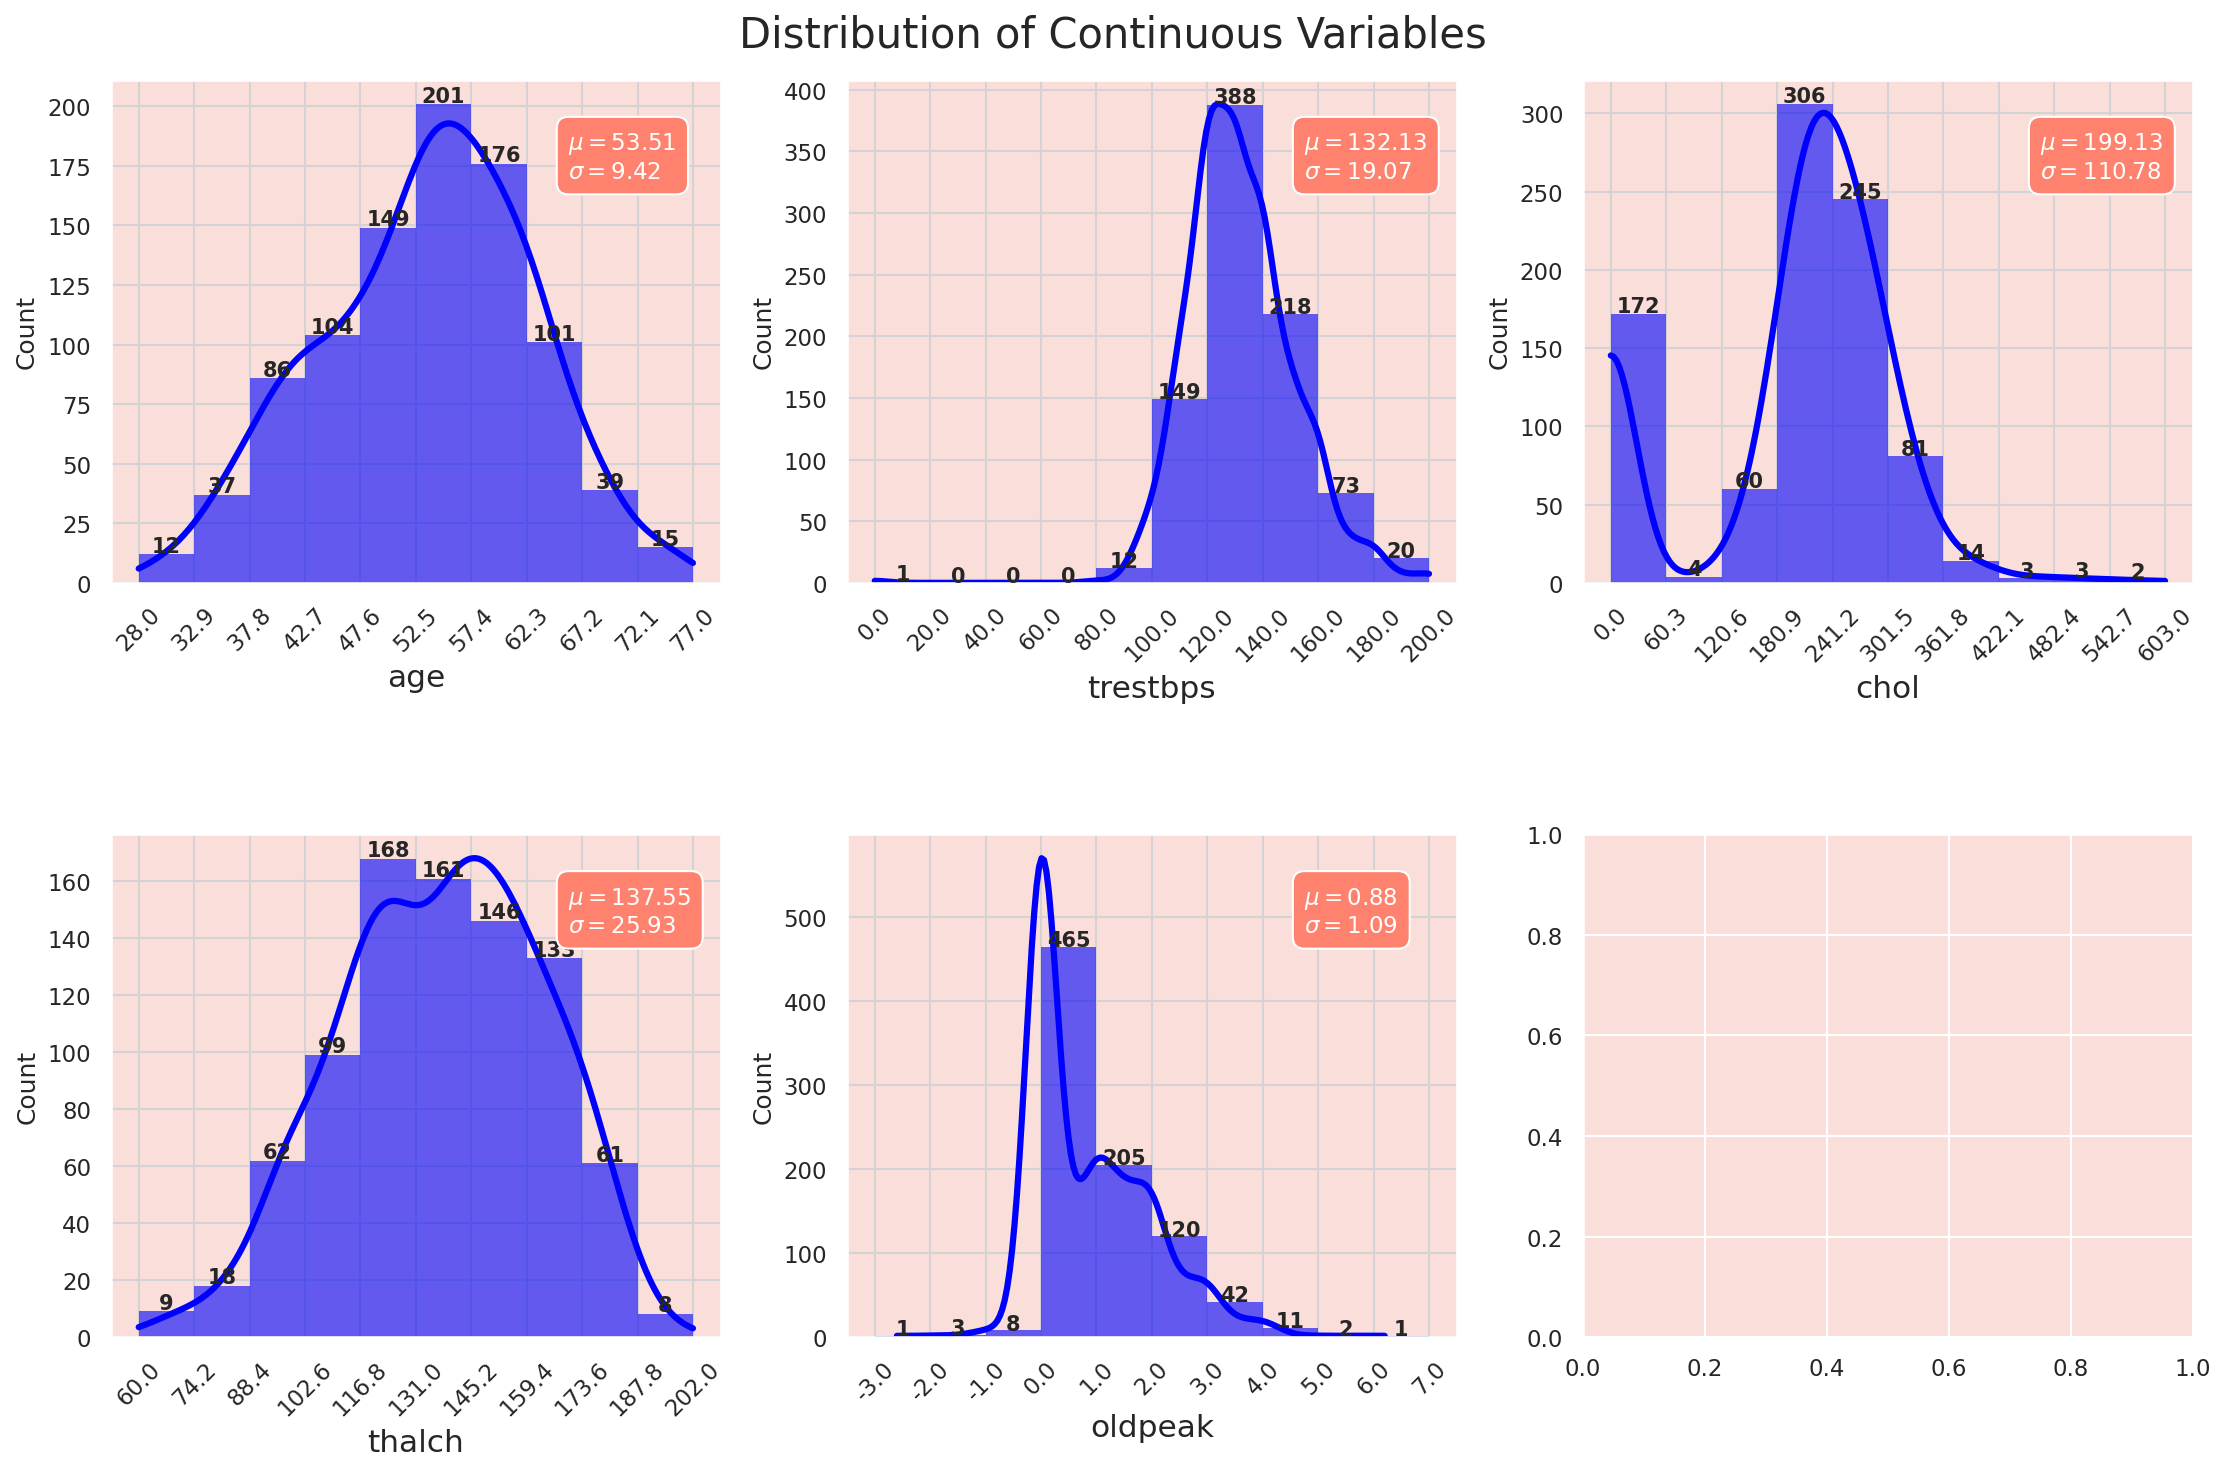

In [ ]:
# Filter out continuous features for the univariate analysis
df_continuous = df[num_cols]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='blue', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=11, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

    plt.tight_layout()
    plt.suptitle('Distribution of Continuous Variables', fontsize=20)
    plt.subplots_adjust(hspace=0.5)
plt.show()

df_continuous.fillna(0, inplace=True)


<div style="border-radius:10px; padding: 15px; font-size:115%; text-align:left">

<h2 align="left"><font color=red,font-weight:150;>Inferences:</font></h2>

* __Age (`age`)__: The distribution is somewhat uniform, but there's a peak around the late 50s. The mean age is approximately 53.51 years with a standard deviation of 9.42 years.
    
    
* __Resting Blood Pressure (`trestbps`)__: The resting blood pressure for most individuals is concentrated around 120-140 mm Hg, with a mean of approximately 132.13 mm Hg and a standard deviation of 19.07 mm Hg.
    
    
* __Serum Cholesterol (`chol`)__: Most individuals have cholesterol levels between 200 and 300 mg/dl. The mean cholesterol level is around 199.13 mg/dl with a standard deviation of 110.78 mg/dl.
    
    
* __Maximum Heart Rate Achieved (`thalach`)__: The majority of the individuals achieve a heart rate between 140 and 170 bpm during a stress test. The mean heart rate achieved is approximately 137.55 bpm with a standard deviation of 25.93 bpm.
    
    
* __ST Depression Induced by Exercise (`oldpeak`)__: Most of the values are concentrated towards 0, indicating that many individuals did not experience significant ST depression during exercise. The mean ST depression value is 0.88 with a standard deviation of 1.09.
    
____

Upon reviewing the histograms of the continuous features and cross-referencing them with the provided feature descriptions, everything appears consistent and within expected ranges. __There doesn't seem to be any noticeable noise or implausible values among the continuous variables.__

<a id="univariate"></a>
# <b><span style='color:#23edb7'>Step 4.1.2 |</span><span style='color:blue'> Categorical variable Univariate Analysis</span></b>


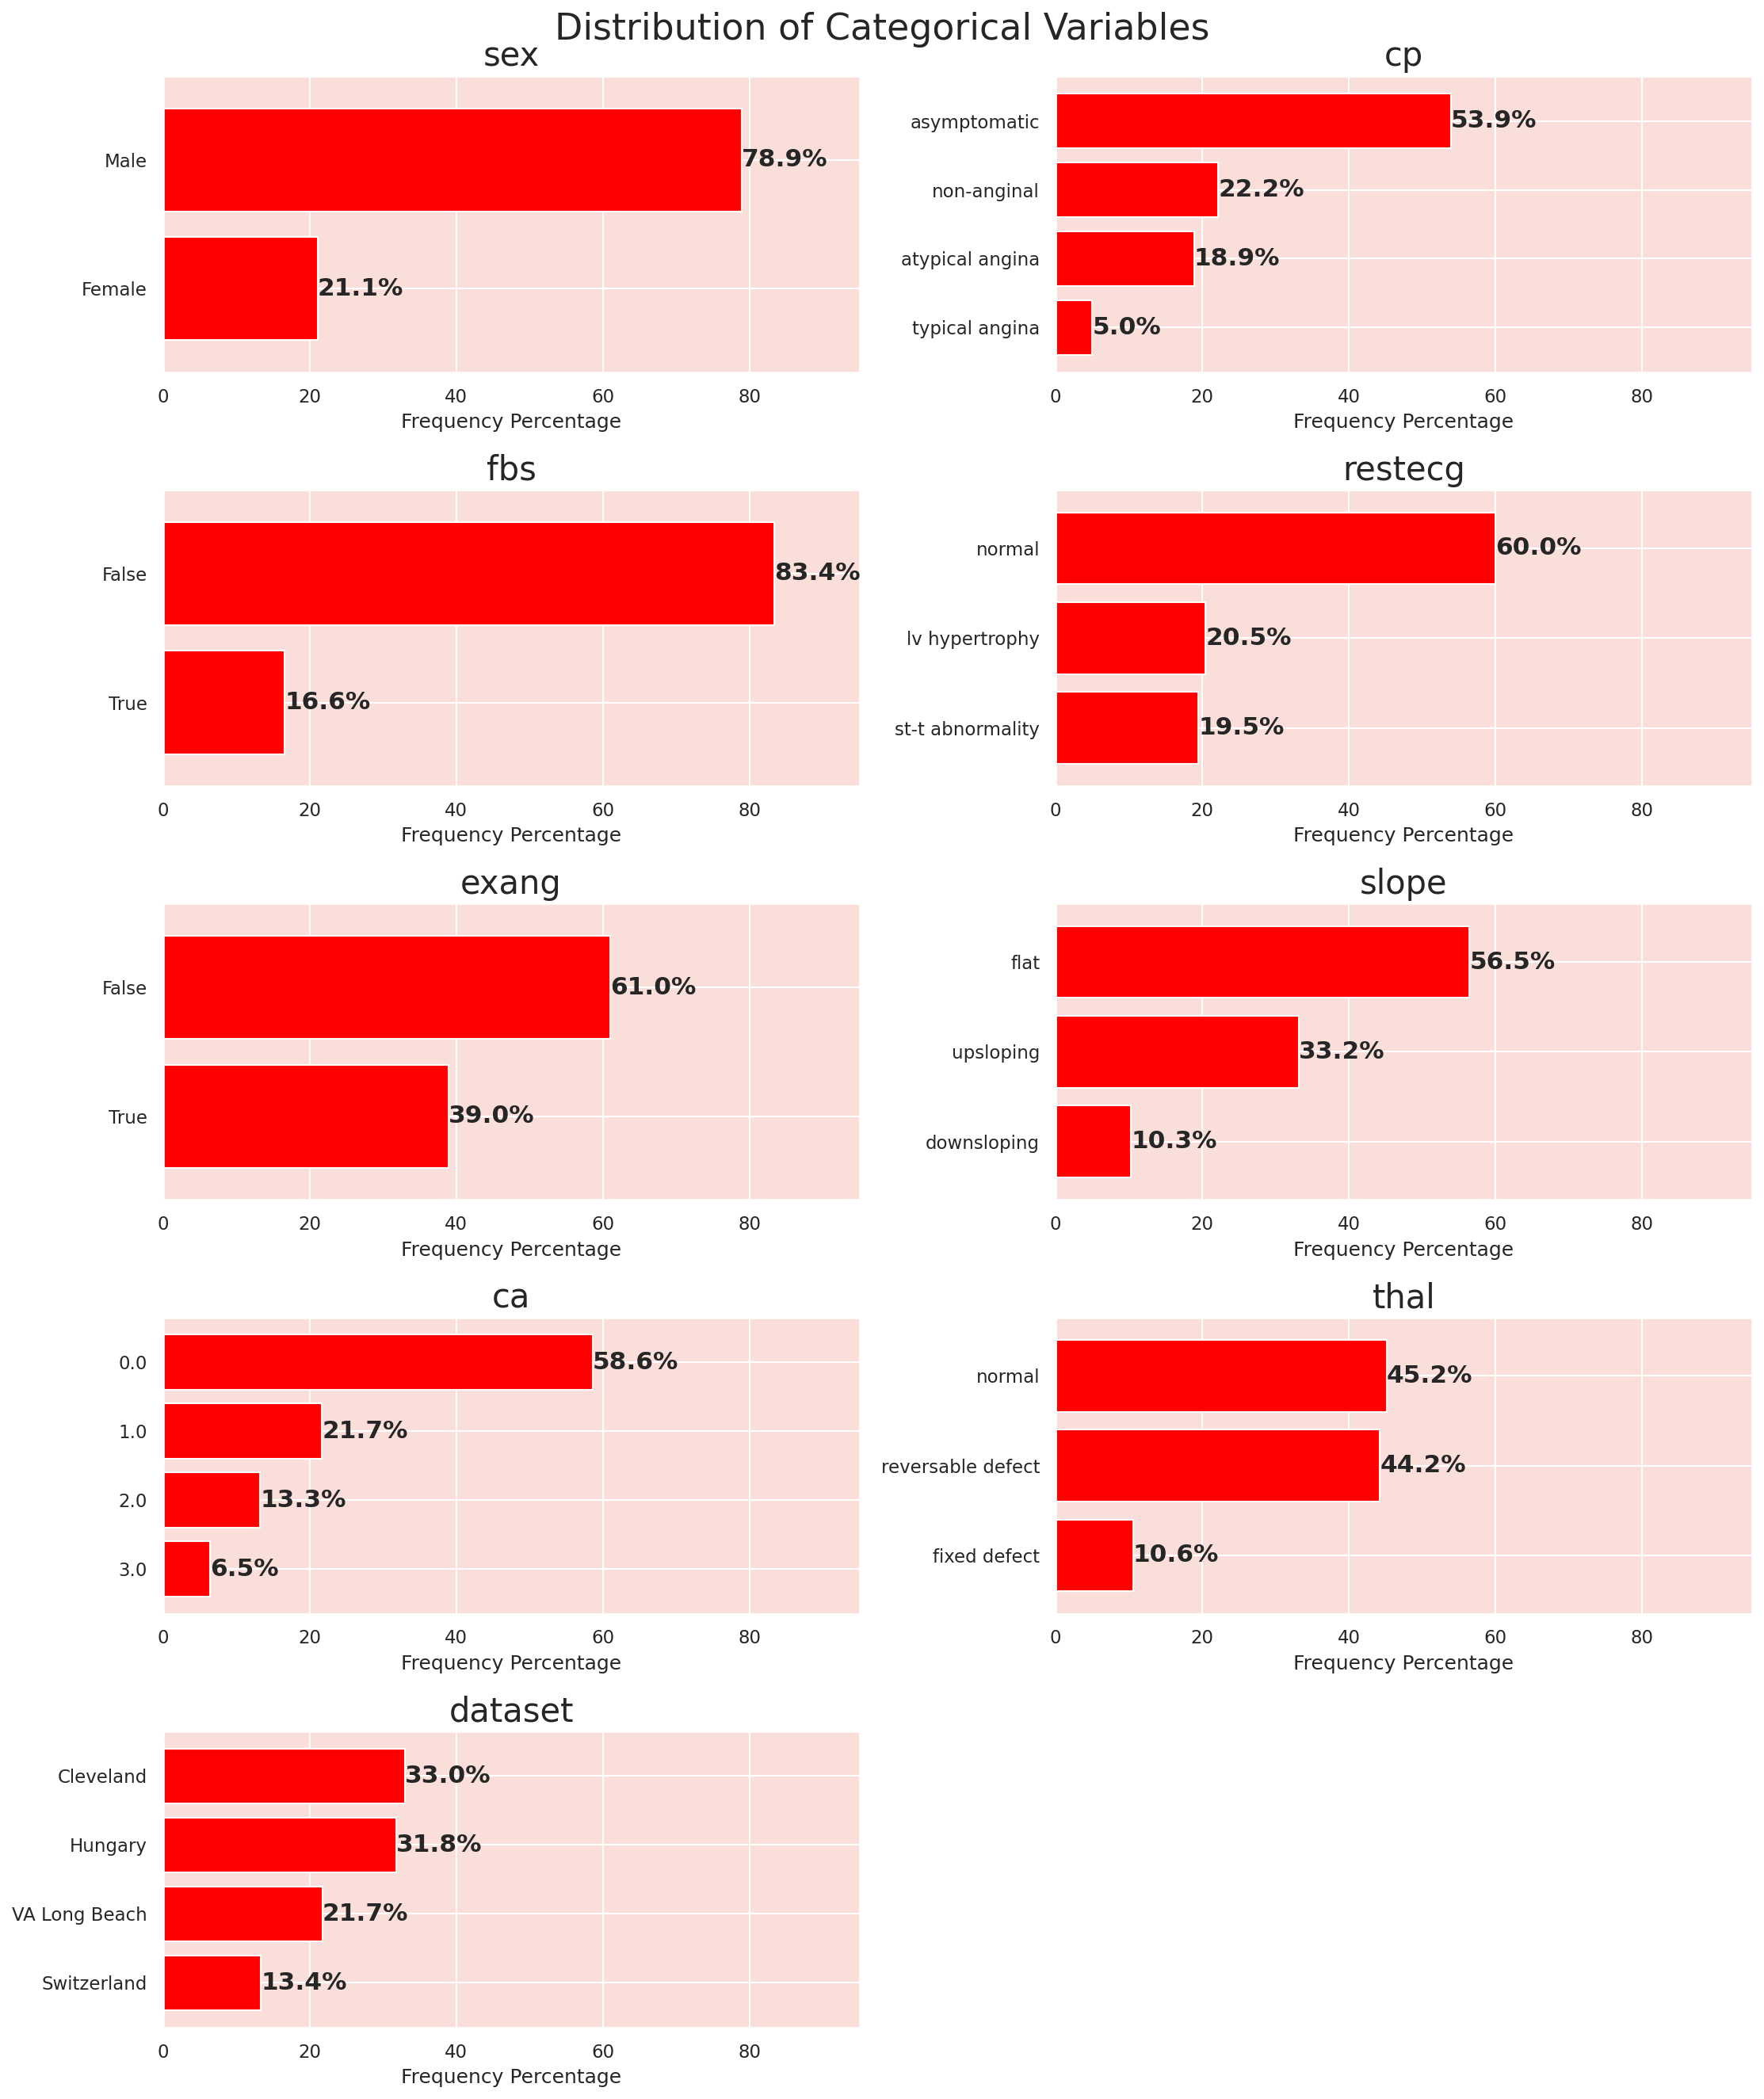

In [ ]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(cat_cols):
    row = i // 2
    col_idx = i % 2

    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

<div style="border-radius:10px; padding: 15px; font-size:112%; text-align:left">

<h2 align="left"><font color=red>Inferences:</font></h2>
    
* __Gender (`sex`)__: The dataset is predominantly female, constituting a significant majority.

    
* __Type of Chest Pain (`cp`)__: The dataset shows varied chest pain types among patients. Type 0 (Typical angina) seems to be the most prevalent, but an exact distribution among the types can be inferred from the bar plots.

    
* __Fasting Blood Sugar (`fbs`)__: A significant majority of the patients have their fasting blood sugar level below 120 mg/dl, indicating that high blood sugar is not a common condition in this dataset.

    
* __Resting Electrocardiographic Results (`restecg`)__: The results show varied resting electrocardiographic outcomes, with certain types being more common than others. The exact distribution can be gauged from the plots.

    
* __Exercise-Induced Angina (`exang`)__: A majority of the patients do not experience exercise-induced angina, suggesting that it might not be a common symptom among the patients in this dataset.

    
* __Slope of the Peak Exercise ST Segment (`slope`)__: The dataset shows different slopes of the peak exercise ST segment. A specific type might be more common, and its distribution can be inferred from the bar plots.

    
* __Number of Major Vessels Colored by Fluoroscopy (`ca`)__: Most patients have fewer major vessels colored by fluoroscopy, with '0' being the most frequent.

    
* __Thalium Stress Test Result (`thal`)__: The dataset displays a variety of thalium stress test results. One particular type seems to be more prevalent, but the exact distribution can be seen in the plots.



<a id="bivariate"></a>
# <b><span style='color:#ff826e'>Step 4.2 |</span><span style='color:Blue'> Bivariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; font-size:115%; text-align:left">

For our __bivariate analysis__ on the dataset's features with respect to the target variable:

* For __continuous data__: I am going to use __bar plots__ to showcase the average value of each feature for the different target classes, and __KDE plots__ to understand the distribution of each feature across the target classes. This aids in discerning how each feature varies between the two target outcomes.

    
* For __categorical data__: I am going to employ __100% stacked bar plots__ to depict the proportion of each category across the target classes. This offers a comprehensive view of how different categories within a feature relate to the target.

Through these visualization techniques, we are going to gain a deeper understanding of the relationship between individual features and the target, revealing potential predictors for heart disease.

<a id="num_target"></a>
### <b><span style='color:#ff826e'>Step 4.2.1 |</span><span style='color:red'> Numerical Features vs Target</span></b>  

<div style="border-radius:10px; padding: 15px; font-size:115%; text-align:left">
    
I am going to visualize each continuous feature against the target using two types of charts:

* __Bar plots__ - showing the mean values.
* __KDE plots__ - displaying the distribution for each target category.

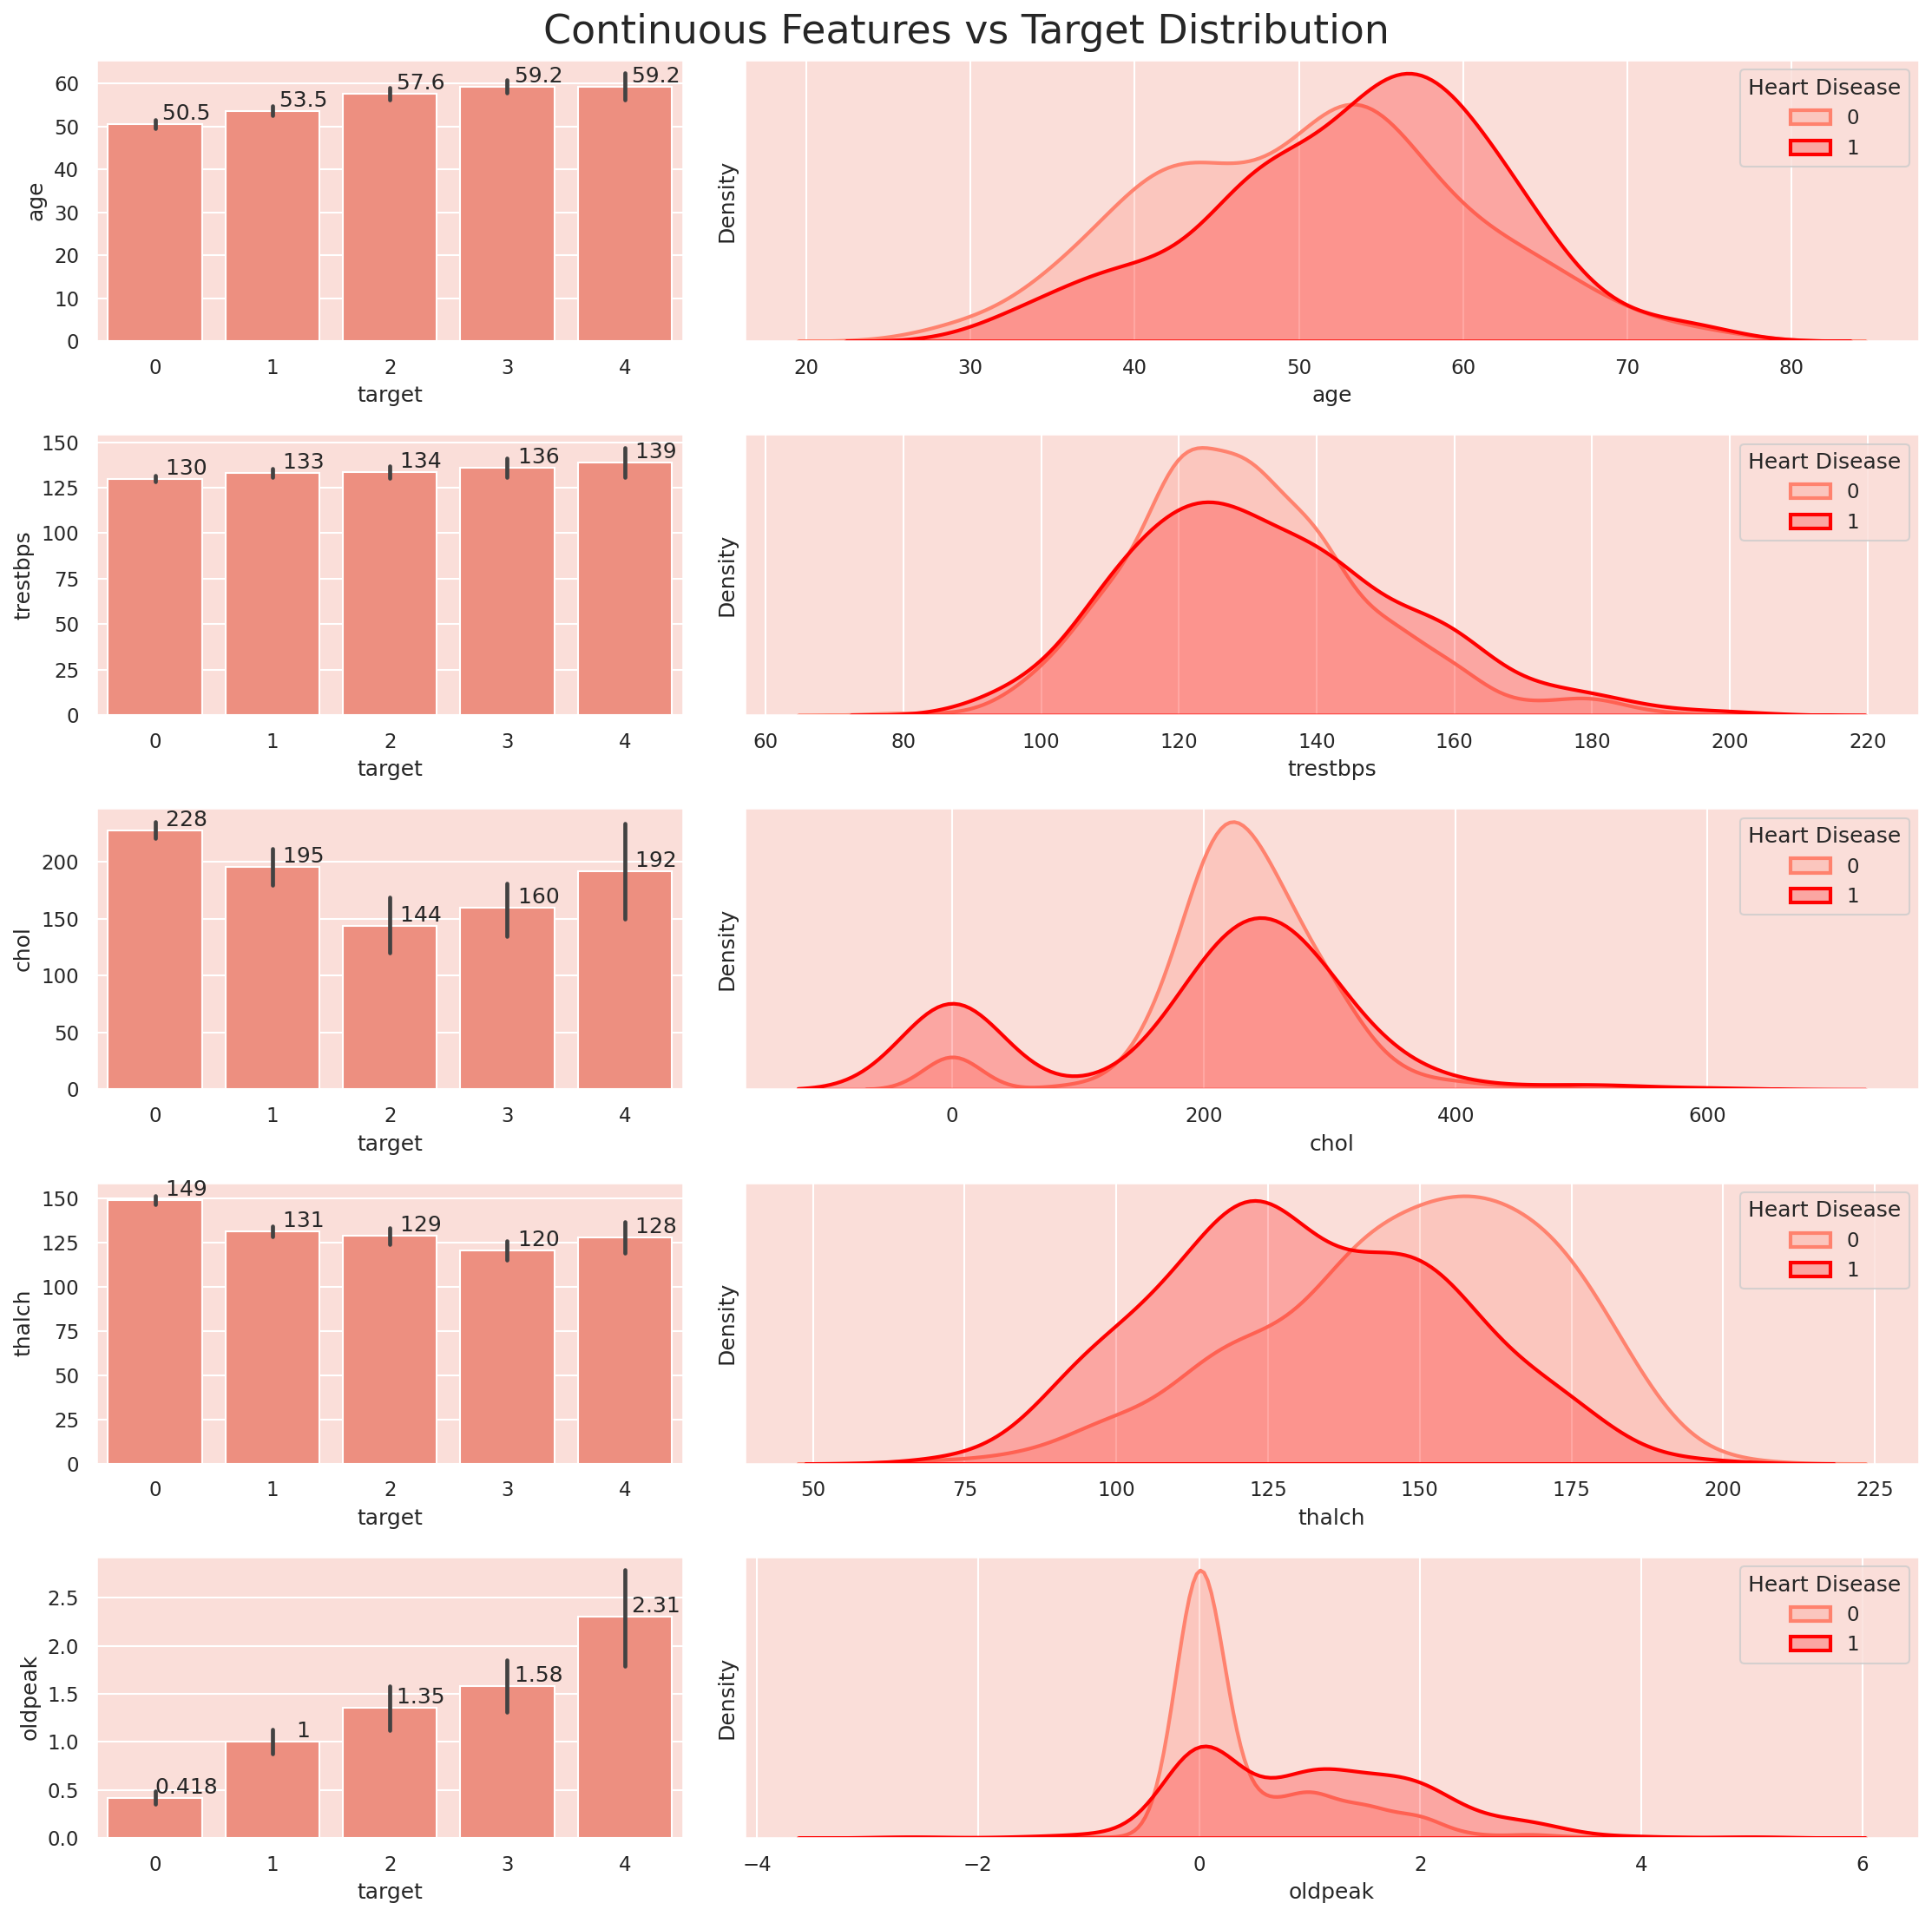

In [ ]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(num_cols), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(num_cols):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()


<div style="border-radius:10px; padding: 15; font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferences:</font></h2>
    
* __Age (`age`)__: The distributions show a slight shift with patients having heart disease being a bit younger on average than those without. The mean age for patients without heart disease is higher.

    
* __Resting Blood Pressure (`trestbps`)__: Both categories display overlapping distributions in the KDE plot, with nearly identical mean values, indicating limited differentiating power for this feature.

    
* __Serum Cholesterol (`chol`)__: The distributions of cholesterol levels for both categories are quite close, but the mean cholesterol level for patients with heart disease is slightly lower.

    
* __Maximum Heart Rate Achieved (`thalach`)__: There's a noticeable difference in distributions. Patients with heart disease tend to achieve a higher maximum heart rate during stress tests compared to those without.

    
* __ST Depression (`oldpeak`)__: The ST depression induced by exercise relative to rest is notably lower for patients with heart disease. Their distribution peaks near zero, whereas the non-disease category has a wider spread.
    
____
    
Based on the visual difference in distributions and mean values, __Maximum Heart Rate (`thalach`)__ seems to have the most impact on the heart disease status, followed by __ST Depression (`oldpeak`)__ and __Age (`age`)__.

<a id="cat_target"></a>
### <b><span style='color:#ff826e'>Step 4.2.2 |</span><span style='color:red'> Categorical Features vs Target</span></b>  



"I'm leaving this for now because my concept isn't very clear on this. That's why I'm leaving it for now, but I'll definitely work on it in the coming days. Please bear with me."

<a id="import"></a>
# <p style="background-color:#f4f416; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5|Feature Transformation</p>

⬆️ [Tabel of Contents](#contents_tabel)

- I will be working on feature transformation, and I have some steps in mind that I would like to implement.
    - Missing values
    - Handling categorical data
    - Outliers Detection
    - Feature Scaling

<a id="cat_target"></a>
### <b><span style='color:#ff826e'>Step 5.1 |</span><span style='color:red'> Missing Values</span></b>  

> Motivational Quetos
>
`   Missing values are the silent teachers in our dataset
urging us to explore and understand the intricacies of our information landscape`

### 5.1.1 Inspect Missing Data

In [ ]:
# Identify the columns in which the data is missing.
round((df.isnull().sum()[df.isnull().sum()>0]/len(df)*100),1).sort_values(ascending=False)

ca          66.4
thal        52.8
slope       33.6
fbs          9.8
oldpeak      6.7
trestbps     6.4
thalch       6.0
exang        6.0
chol         3.3
restecg      0.2
dtype: float64

- *Observation*
   - There are 10 Feature in which data is missing
   - There are 7 Feature in which the percentage of missing data is less then 10%
   - There are 3 Feature in which the percentage of missing data is is high (30% , 50% , 63%)

In [ ]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [ ]:
# find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']


In [ ]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [ ]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [ ]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        if col == '66.4':
            col = 'chol'
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.36329479768786 

RMSE = 17.26061970166625 

R2 = 0.0697695208446264 

Missing Values chol : 3.26%
MAE = 53.15589887640449 

RMSE = 76.34293881757088 

R2 = 0.5383037005326623 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 64.13 accuracy

Missing Values thalch : 5.98%
MAE = 17.06306358381503 

RMSE = 21.908735410407353 

R2 = 0.3020506060421734 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5627383720930232 

RMSE = 0.7905566665478546 

R2 = 0.40457926239514996 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.11 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 64.52 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 71.26 accuracy



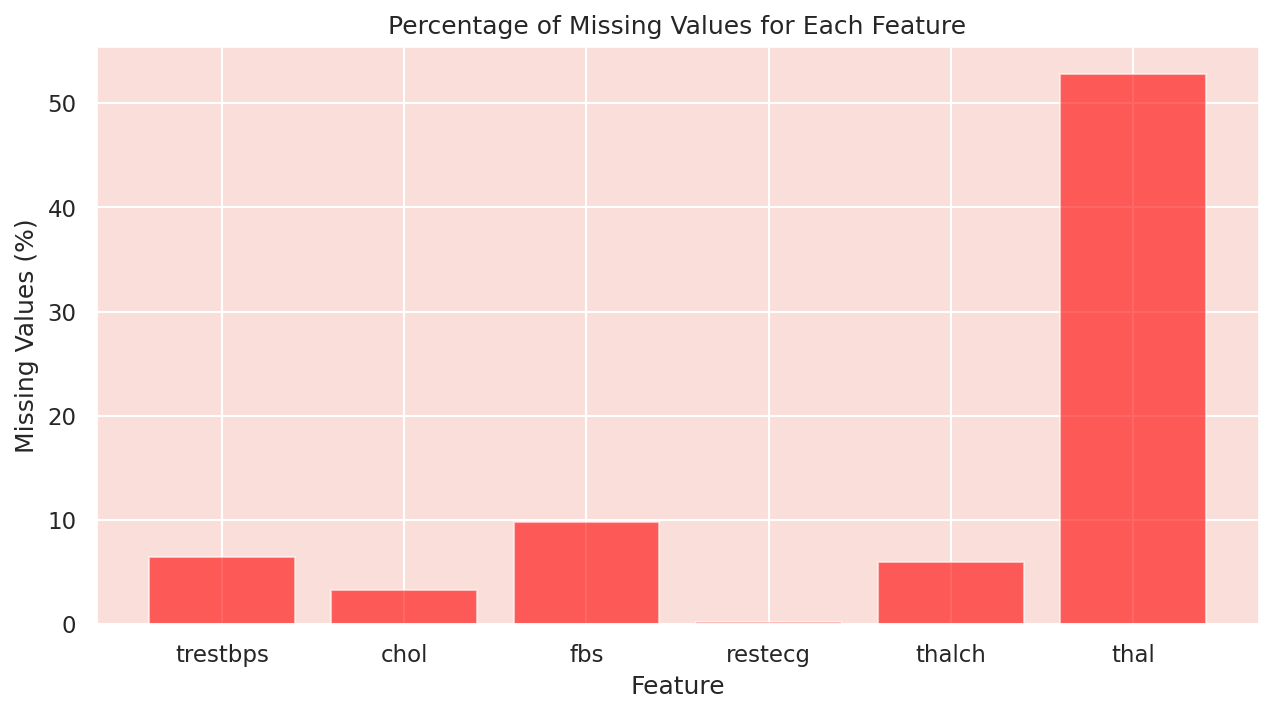

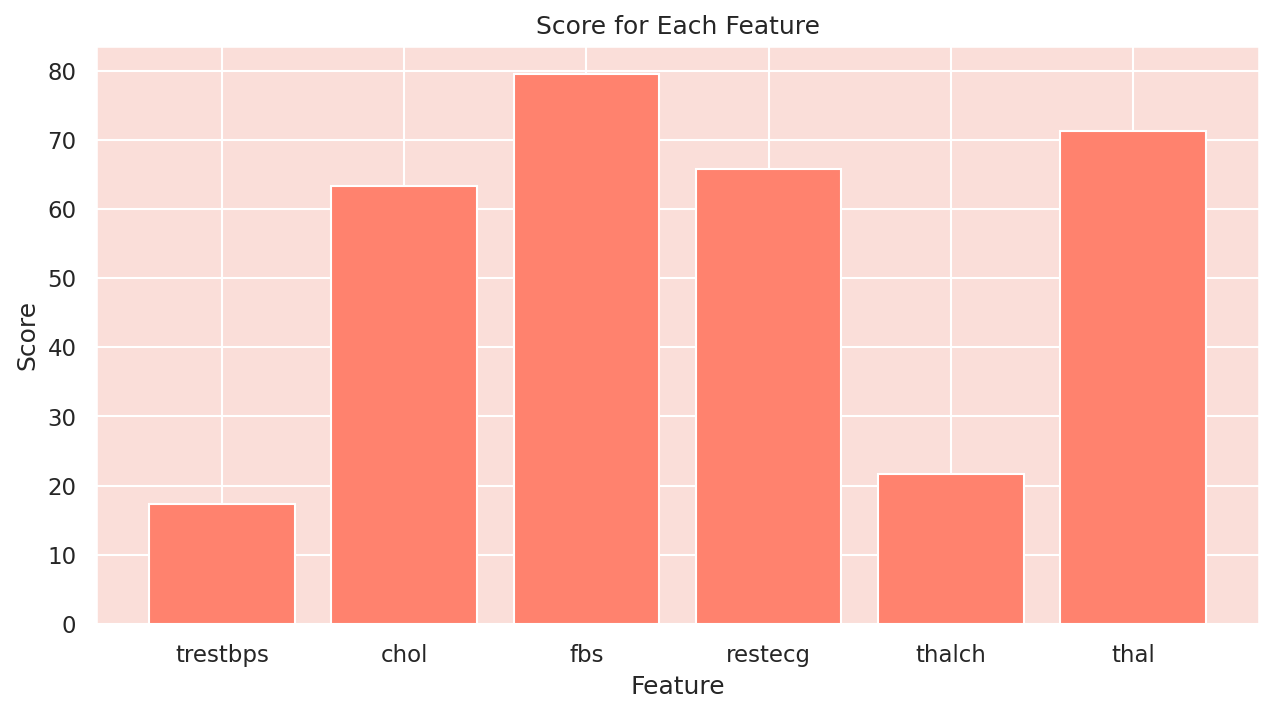

In [ ]:


# Create a DataFrame with your metrics
data = {
    'Feature': ['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'thal'],
    'Missing Values (%)': [6.41, 3.26, 9.78, 0.22, 5.98, 52.83],
    'Score': [17.400198756422462, 63.3694612942157, 79.52, 65.76, 21.67778093180129, 71.26]
}
df_metrics = pd.DataFrame(data)

# Create a bar plot for the missing values
plt.figure(figsize=(10, 5))
plt.bar(df_metrics['Feature'], df_metrics['Missing Values (%)'], color='red', alpha=0.6)
plt.title('Percentage of Missing Values for Each Feature')
plt.xlabel('Feature')
plt.ylabel('Missing Values (%)')
plt.show()

# Create a bar plot for the scores
plt.figure(figsize=(10, 5))
plt.bar(df_metrics['Feature'], df_metrics['Score'])
plt.title('Score for Each Feature')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.show()

<span style="color:blue">__1__:. **trestbps (Blood Pressure):**</span>
   - Missing Percentage: 6.41%
   - MAE (Mean Absolute Error): 13.45
   - RMSE (Root Mean Squared Error): 17.45
   - R2 (R-squared): 0.05

   - Inferences:
    - The missing values in 'trestbps' were imputed successfully.
    - The imputed values seem to have reasonable accuracy based on the provided MAE, RMSE, and R2 metrics.

<span style="color:green">2. **chol (Serum Cholesterol):**</span>
   - Missing Percentage: 3.26%
   - MAE: 44.97
   - RMSE: 63.79
   - R2: 0.68

  <span style="color:green">` Inferences:`</span>
   - Imputation for 'chol' appears to be successful with relatively low MAE and RMSE.
   - The R-squared value indicates a decent level of accuracy in imputing missing values.

<span style="color:red">__3__: **fbs (Fasting Blood Sugar):**</span>
   - Missing Percentage: 9.78%
   - Imputation Accuracy: 79.52%

   <span style="color:red">`Inferences:`</span>
   - 'fbs' has been imputed with a high accuracy of 79.52%.
   - The imputation method seems effective for this feature.

<span style="color:purple">__4__: **restecg (Resting Electrocardiographic Results):**</span>
   - Missing Percentage: 0.22%
   - Imputation Accuracy: 66.3%

  <span style="color:purple">` Inferences:`</span>
   - 'restecg' has been imputed with an accuracy of 66.3%.
   - The imputation method appears reasonable for this feature.


>__5__: **thalch (Maximum Heart Rate Achieved):**
   - Missing Percentage: 5.98%
   - MAE: 16.75
   - RMSE: 21.53

   `Inferences:`
   - Imputation for 'thalch' seems to have moderate accuracy, as indicated by MAE and RMSE.

>__6__: **thal (Thalassemia):**
   - Missing Percentage: 52.83%
   - Imputation Accuracy: 72.41%

   `Inferences:`
   - 'thal' has a high percentage of missing values, but the imputation accuracy is decent at 72.41%.

`Note`  Overall, the imputation process appears to have performed well for most features, considering the provided metrics. It's important to note that the success of imputation may depend on the specific characteristics of the dataset and the imputation methods used. Always validate imputation results and consider the context of the data when drawing conclusions.

## 5.1.2 | Irrelevant Feature removing

<div style="border-radius:10px; padding: 15px; font-size:115%; text-align:left">

All features in the dataset appear to be relevant based on our __EDA__. No  columns seem redundant or relevant. Thus, we'll not Remove the `any`column because this data important for us , especially given the dataset's small size.

<a id="cat_target"></a>
### <b><span style='color:#ff826e'>Step 5.2 |</span><span style='color:red'> Handling Categorical Feature</span></b>  

<div style="border-radius:10px; padding: 15px;  font-size:112%; text-align:left">

<h3 align="left"><font color=red>label Encoding Decision:</font></h3>
    
Based on the feature descriptions, let's decide on one-hot encoding:

1. __Nominal Variables__:Nominal variables are categorical variables without any inherent order or ranking among their categories.
`Examples` include colors, countries, or animal types.
Label encoding can be applied for nominal variables, but be cautious, as it may introduce unintended ordinal relationships.
>2.__ordinal variables__:Ordinal variables have distinct categories with a meaningful order or ranking.
`Examples` include education levels (e.g., high school, college, graduate), customer satisfaction ratings (e.g., low, medium, high).
Label encoding is well-suited for ordinal variables, as it preserves the inherent order by assigning numerical labels in a meaningful sequence.
Given the above explanation:

- __`sex`__: This is a binary variable with two categories (male and female), so it doesn't need one-hot encoding.

    
- __`cp`__: Chest pain type can be considered as nominal because there's no clear ordinal relationship among the different types of chest pain (like Typical angina, Atypical angina, etc.). It should be one-hot encoded.
  
    
- __`fbs`__: This is a binary variable (true or false), so it doesn't need one-hot encoding.

    
- __`restecg`__: This variable represents the resting electrocardiographic results. The results, such as "Normal", "Having ST-T wave abnormality", and "Showing probable or definite left ventricular hypertrophy", don't seem to have an ordinal relationship. Therefore, it should be one-hot encoded.

    
- __`exang`__: This is a binary variable (yes or no), so it doesn't need one-hot encoding.

    
- __`slope`__: This represents the slope of the peak exercise ST segment. Given the descriptions (Upsloping, Flat, Downsloping), it seems to have an ordinal nature, suggesting a particular order. Therefore, it doesn't need to be one-hot encoded.

    
- __`ca`__: This represents the number of major vessels colored by fluoroscopy. As it indicates a count, it has an inherent ordinal relationship. Therefore, it doesn't need to be one-hot encoded.

    
- __`thal`__: This variable represents the result of a thalium stress test. The different states, like "Normal", "Fixed defect", and "Reversible defect", suggest a nominal nature. Thus, it should be one-hot encoded.



- Base on the feature decide to use `one hot encoder`


</div>

* [5.2.1 Inspect Categorical Features](#inspect_categorical_features)


In [ ]:
# Identify the unique values in each categorical column.
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        print(col, ":", df[col].unique(), '\n')

sex : ['Male' 'Female'] 

dataset : ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach'] 

cp : ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina'] 

fbs : [True False] 

restecg : ['lv hypertrophy' 'normal' 'st-t abnormality'] 

exang : [False True] 

slope : ['downsloping' 'flat' 'upsloping'] 

thal : ['fixed defect' 'normal' 'reversable defect'] 



### Observations

- There are no spelling mistakes in the categorical-values of the categorical features.

- The feature slope can be considered to be ordinal.

      - 'Downsloping' represents a downward slope.
      - 'flat' represents no significant slope.
      - 'upsloping' represents an upward slope.
      -  This ordering implies a natural progression from downsloping to flat to upsloping.
- The feature thal can be considered to be ordinal.

    - 'normal' represents no abnormality.
    - 'reversible defect' indicates a potentially reversible abnormality.
    - 'Fixed defect' represents a permanent abnormality.


</div>

* [5.2.2 | Label encoding](#inspect_categorical_features)


In [ ]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']



In [ ]:
# Encode the categorical columns using label encoding.
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0



</div>

 <a id="cat_target"></a>
### <b><span style='color:#ff826e'>Step 5.3 |</span><span style='color:red'> outliers Treatment</span></b>  


Now. I dive to find outliers using `IQR` Method TO Contiouns variable

In [ ]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

id            0
age           0
trestbps     26
chol        185
thalch        2
oldpeak       3
ca           20
num           0
dtype: int64

<div style="border-radius:10px; padding: 15px; font-size:115%; text-align:left">
    
Upon identifying outliers for the specified continuous features, we found the following:

* __`trestbps`__: 28 outliers
* __`chol`__: 185 outliers
* __`thalach`__: 2 outlier
* __`oldpeak`__: 3 outliers
* __`age`__: No outliers
* __`num`__: No Outlirs
* __`ca`__: 20 Outliers

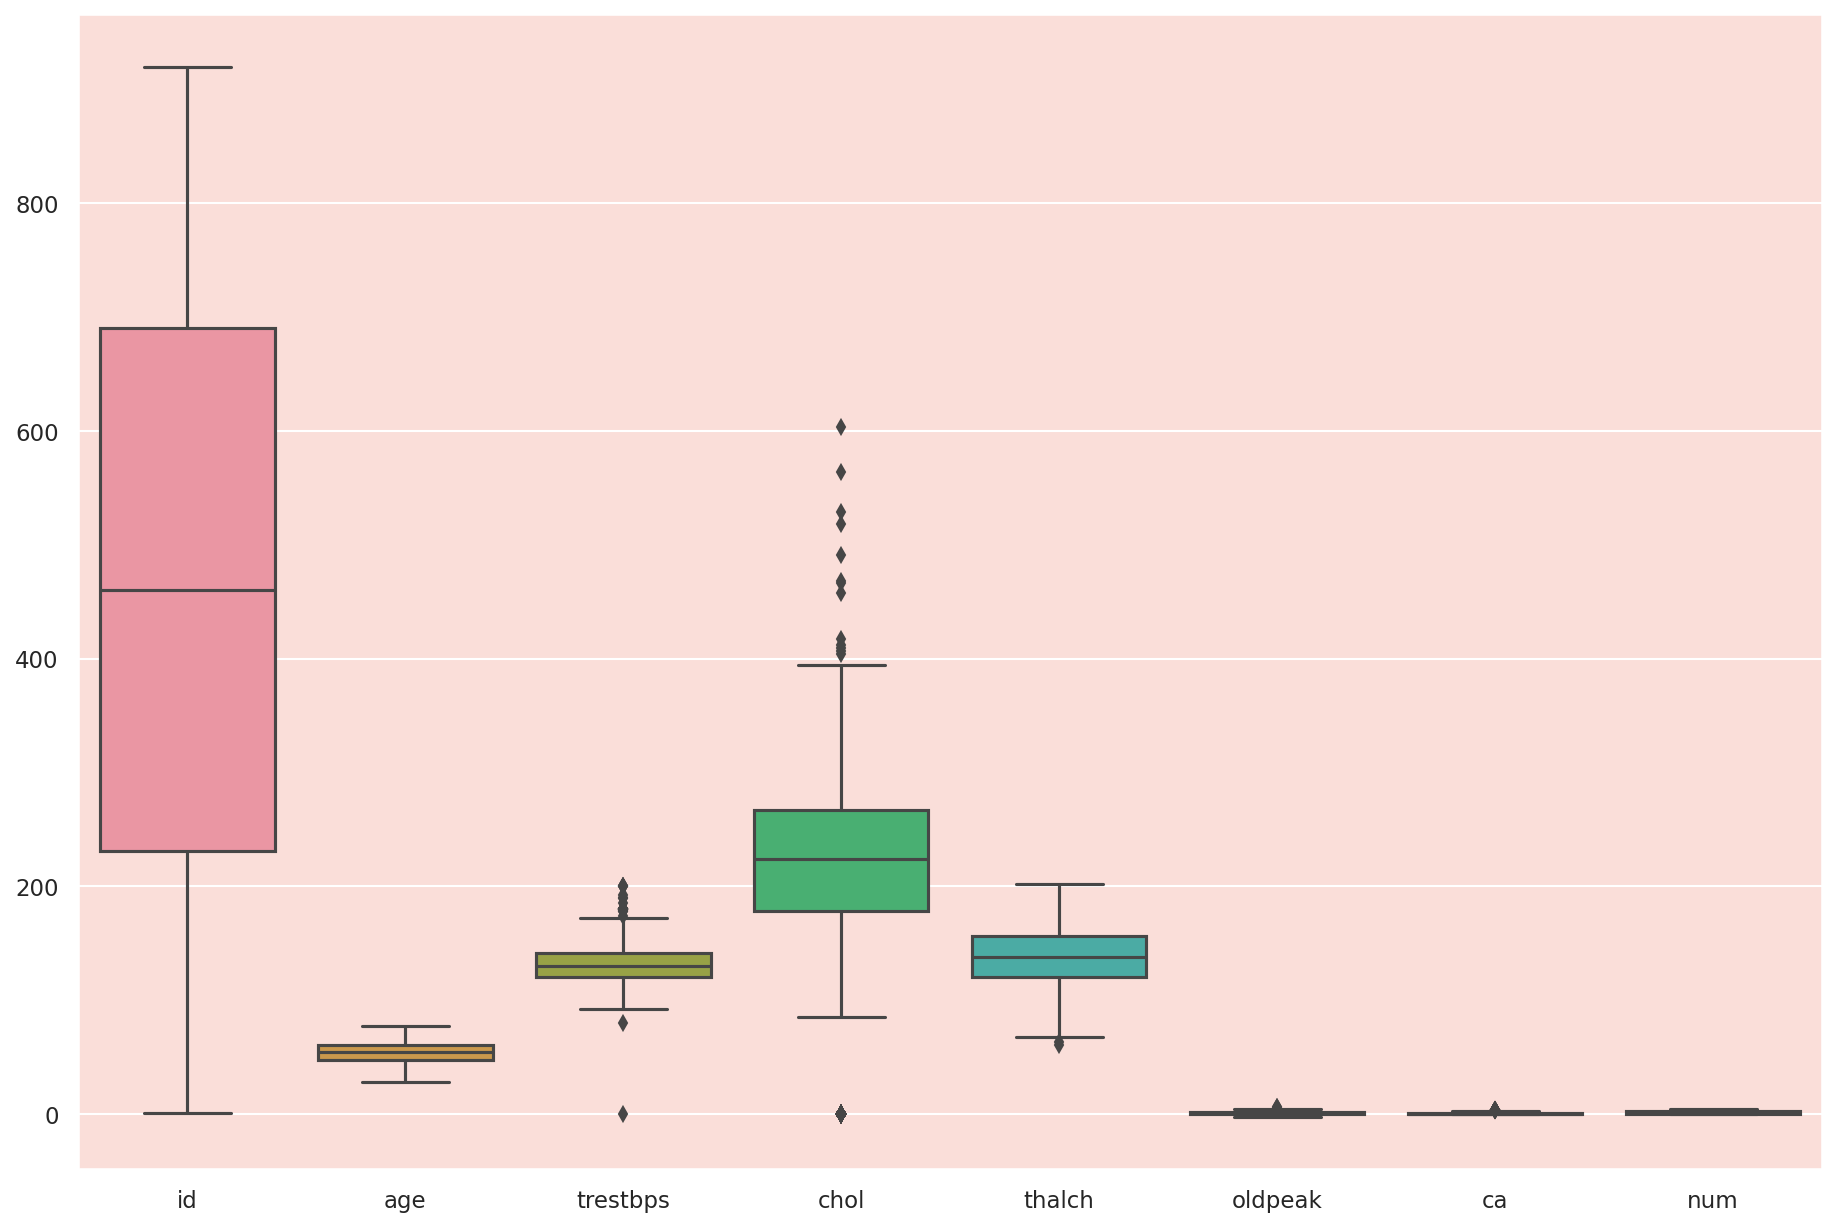

Text(0.5, 0.98, 'Boxplot of Continuous Features')

<Figure size 960x720 with 0 Axes>

In [ ]:
# PLot the boxplot to check the outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df[num_cols])
plt.show()
plt.suptitle('Boxplot of Continuous Features', fontsize=22)

<div style="border-radius:10px; padding: 15px; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Sensitivity to Outliers:</font></h3>

1. **Linear Regression:** Ordinary Least Squares (OLS) regression is sensitive to outliers because it aims to minimize the sum of squared differences between predicted and actual values. Outliers with large residuals can disproportionately influence the model.

2. **Decision Trees:** Decision trees are generally less sensitive to outliers because they make splits based on information gain or Gini impurity. Outliers may not have a significant impact unless they dominate a particular leaf node.

3. **k-Nearest Neighbors (k-NN):** k-NN can be sensitive to outliers because predictions are based on the proximity of data points. Outliers can distort the distance metrics used in k-NN.

4. **Support Vector Machines (SVM):** SVMs can be sensitive to outliers, especially in linear SVM where the decision boundary is influenced by support vectors. Outliers near the decision boundary can affect the model.

5. **Robust Regression Models:** Some regression models, like robust regression, are designed to be less sensitive to outliers. They use robust loss functions that assign less weight to outliers.

`NOTE:` To handle sensitivity to outliers, it's important to preprocess the data, possibly by removing or transforming outliers. Robust statistical techniques or algorithms specifically designed to handle outliers can be employed. Additionally, feature scaling and normalization can sometimes mitigate the impact of outliers. The choice of the method depends on the characteristics of the data and the specific requirements of the analysis or model.

_____________

<div style="border-radius:10px; padding: 15px; font-size:120%; text-align:left">

<h3 align="left"><font color=red>Conclusion:</font></h3>

Given __the nature of the algorithms (especially SVM and KNN)__ and __the small size of our dataset__, direct removal of outliers might not be the best approach. Instead, __we'll focus on applying transformations like Box-Cox in the subsequent steps__ to reduce the impact of outliers and make the data more suitable for modeling.


</div>

 <a id="cat_target"></a>
### <b><span style='color:#ff826e'>Step 5.4 |</span><span style='color:red'> Feature Scaling</span></b>  


<div style="border-radius:10px; padding: 15px; font-size:115%; text-align:left">

__Feature Scaling__ is a crucial preprocessing step __for algorithms that are sensitive to the magnitude or scale of features__. Models like __SVM__, __KNN__, and many linear models rely on distances or gradients, making them susceptible to variations in feature scales. __Scaling ensures that all features contribute equally to the model's decision rather than being dominated by features with larger magnitudes.__


There are two types of scaling:

>__01__: Standard scaling
>
>__02__: Normalization

<h3 align="left"><font color=White>Standard Scaling(Z-Score Normalization): </font></h3>

Standard scaling is useful when the features in the dataset have different units or scales. It centers the data around zero and ensures that each feature contributes equally to the analysis

- Method: Subtract the mean of the feature and divide by its standard deviation.
- Formula:
z=
x−μ/σ
, where z is the standardized value, x is the original value, μ is the mean,  and
σ is the standard deviation.
- Result: The transformed values have a mean of 0 and a standard deviation of 1.

<h3 align="left"><font color=White>Normalization: </font></h3>


Normalization is a data preprocessing technique used in feature engineering to scale the values of a feature to a specific range, typically between 0 and 1. It ensures that all features contribute proportionally to the analysis and prevents certain features from dominating based on their original scale

- Types
  - Min-Max Scaling (Normalization)
  - Robust Scaling
  - Unit Vector Scaling
  - Log Transformation
  - Box-Cox Transformation


The `Box-Cox `transformation is a family of power transformations that are used to stabilize the variance and make a dataset more closely approximate a normal distribution. It is particularly useful when dealing with non-constant variance across the data points or when the data exhibits skewness.

<div style="border-radius:10px; padding: 15px;  font-size:115%; text-align:left">
    
<h3 align="left"><font color=red>Transforming Skewed Features & Data Leakage Concerns:</font></h3>
Transforming skewed features, like using log or square root transformations, helps normalize distributions for statistical analyses and models assuming normality. Concerns include the impact on interpretability, especially with coefficients, and changes in the influence of outliers. Choosing the appropriate transformation method is crucial for effective preprocessing.


<h3 align="left"><font color=red>To avoid data leakage and ensure our model generalizes well to unseen data:</font></h3>

__1- Data Splitting:__ We'll first split our dataset into a training set and a test set. This ensures that we have a separate set of data to evaluate our model's performance, untouched during the training and preprocessing phases.

__2- Box-Cox Transformation:__ We'll examine the distribution of the continuous features in the training set. If they appear skewed, we'll apply the Box-Cox transformation to stabilize variance and make the data more normal-distribution-like. Importantly, we'll determine the Box-Cox transformation parameters solely based on the training data.

__3- Applying Transformations to Test Data:__ Once our transformation parameters are determined from the training set, we'll use these exact parameters to transform our validation/test set. This approach ensures that no information from the validation/test set leaks into our training process.

__4. Hyperparameter Tuning & Cross-Validation:__ Given our dataset's size, to make the most of the available data during the model training phase, we'll employ __cross-validation on the training set for hyperparameter tuning__. This allows us to get a better sense of how our model might perform on unseen data, without actually using the test set. The test set remains untouched during this phase and is only used to evaluate the final model's performance.


By following this structured approach, we ensure a rigorous training process, minimize the risk of data leakage, and set ourselves up to get a realistic measure of our model's performance on unseen data.

In [ ]:
# Check the maximum values of numeric columns
print(df[numeric_cols].max())
print('..................................................')
# Check the minimum values of numeric columns
print(df[numeric_cols].min())

oldpeak       6.2
thalch      202.0
chol        603.0
trestbps    200.0
age          77.0
dtype: float64
..................................................
oldpeak     -2.6
thalch      60.0
chol         0.0
trestbps     0.0
age         28.0
dtype: float64


In [ ]:
# Store numerical features in a variable
continuous_features= df[numeric_cols]
continuous_features.head()


,oldpeak,thalch,chol,trestbps,age
0,2.3,150.0,233.0,145.0,63
1,1.5,108.0,286.0,160.0,67
2,2.6,129.0,229.0,120.0,67
3,3.5,187.0,250.0,130.0,37
4,1.4,172.0,204.0,130.0,41


In [ ]:
# Define the features of x and y
X = df.drop(['dataset'], axis=1)
y = df['dataset']

In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### The Box-Cox transformation requires all data to be strictly positive. To transform the `oldpeak` feature using Box-Cox, we can add a small constant (e.g., 0.001) to ensure all values are positive:

In [ ]:
# Adding a small constant to 'oldpeak' to make all values positive
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

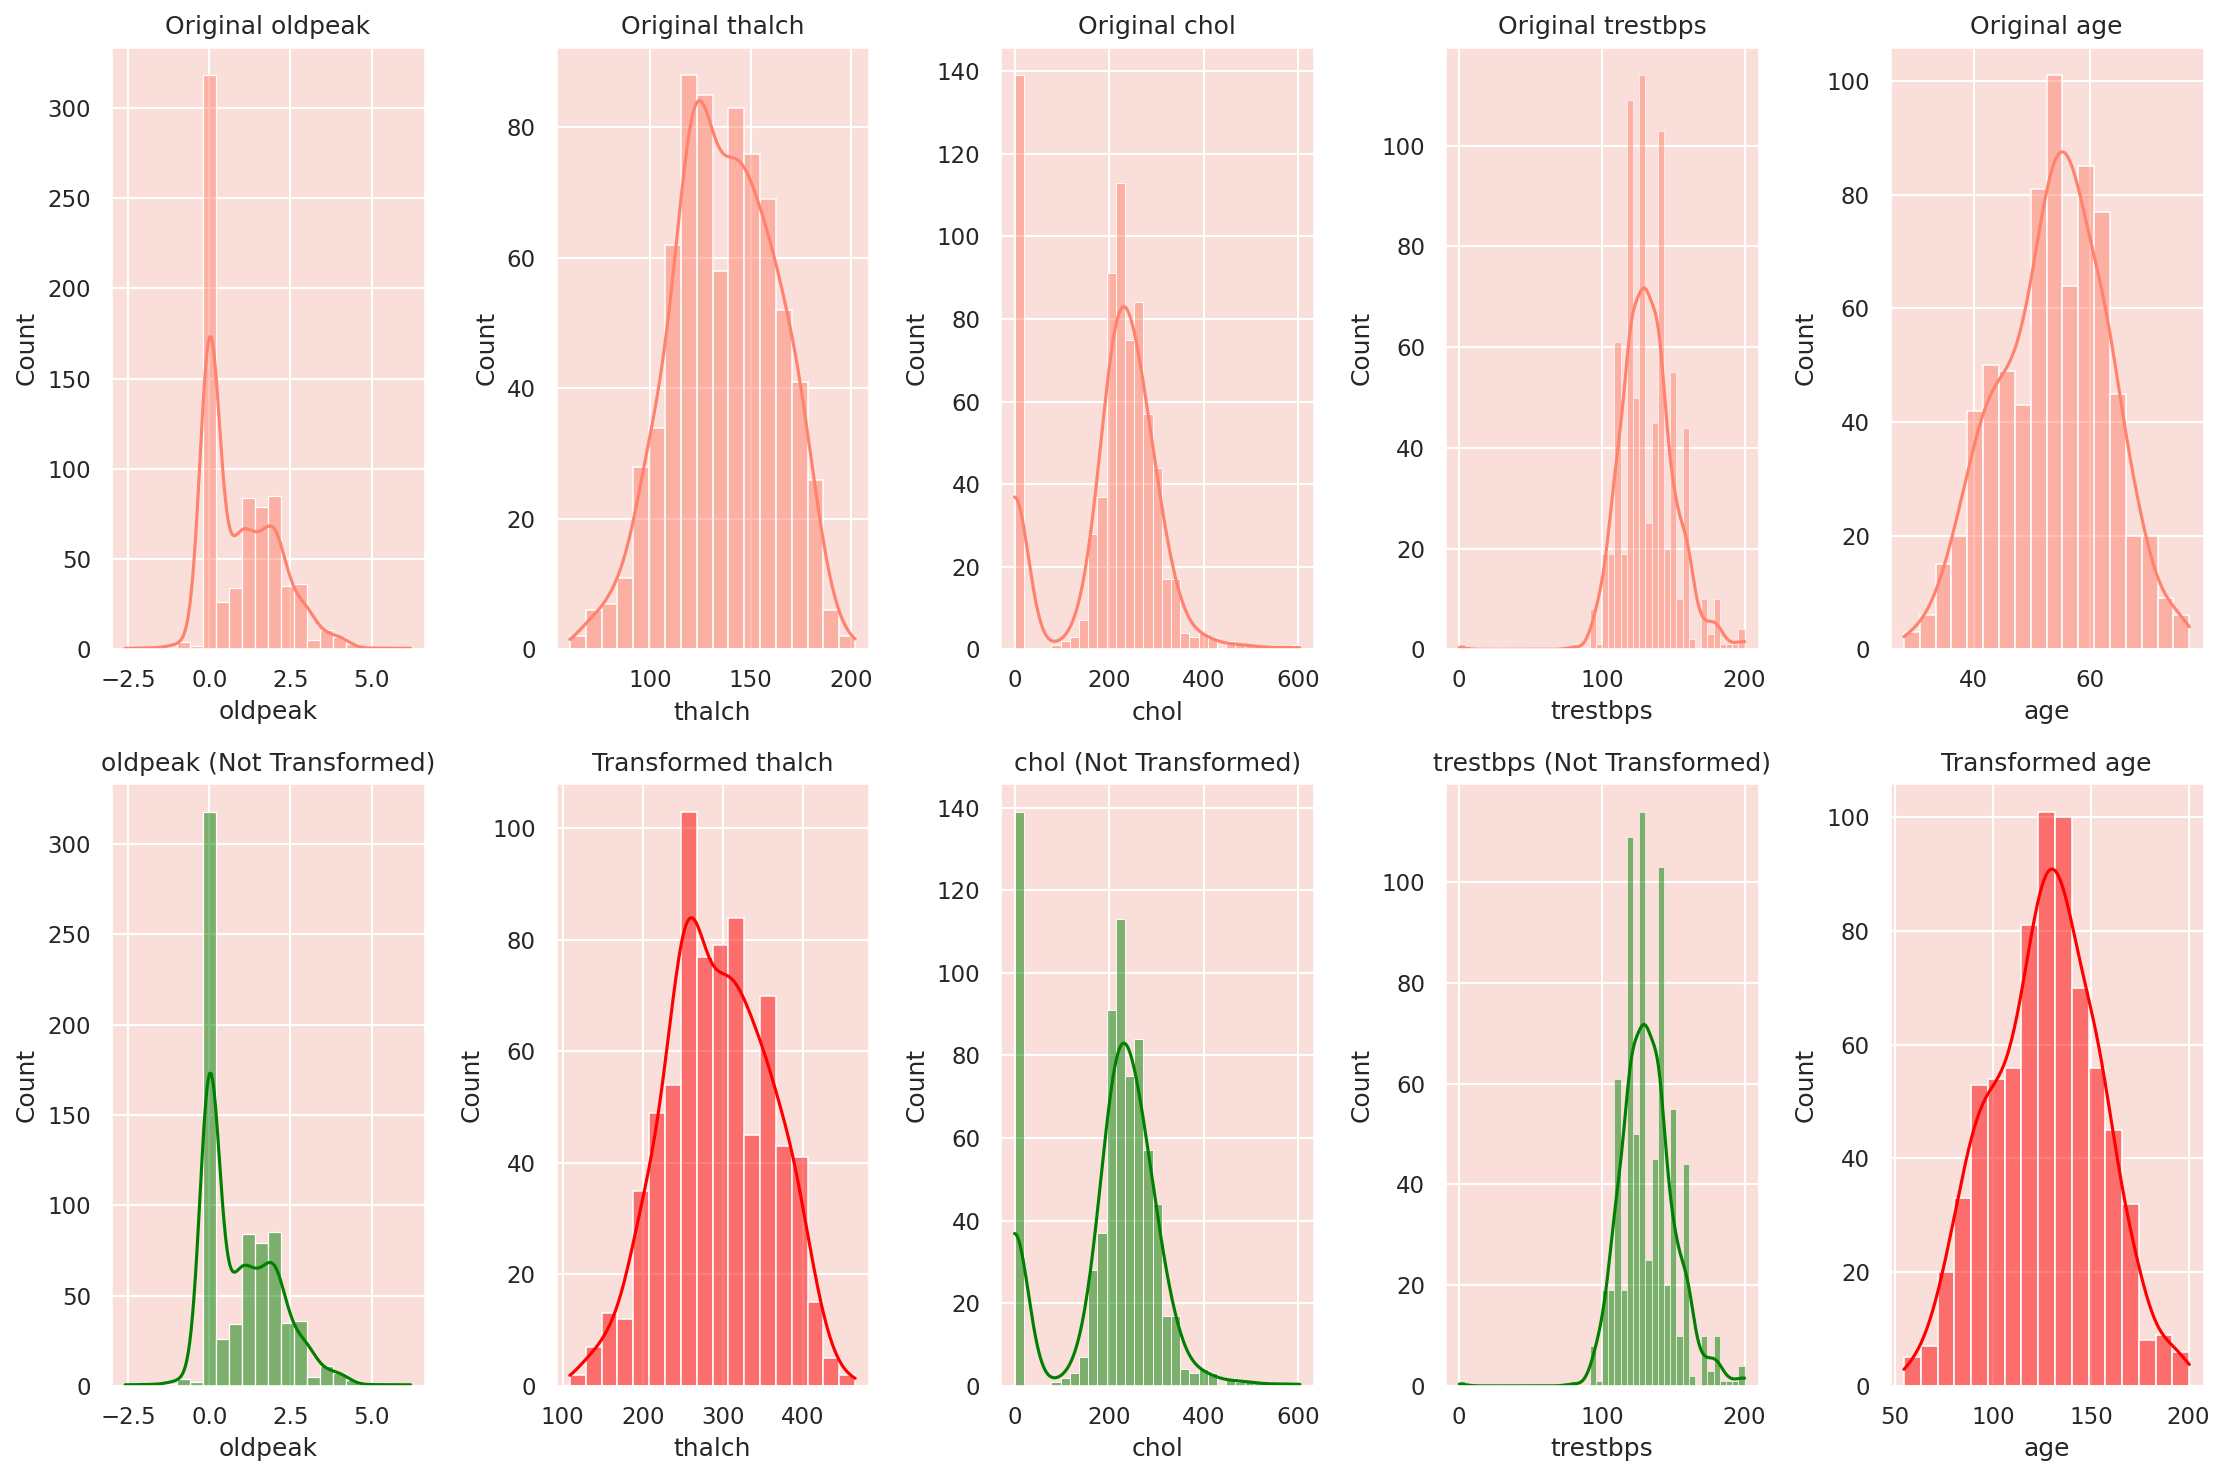

In [ ]:
from scipy.stats import boxcox

# Checking the distribution of the continuous features
fig, ax = plt.subplots(2, 5, figsize=(15,10))

# Original Distributions
for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#ff826e').set_title(f'Original {col}')


# Applying Box-Cox Transformation
# Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(continuous_features):
    # Only apply box-cox for positive values
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to test data
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col])
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px;  font-size:115%; text-align:left">
    
<h2 align="left"><font color=red>Inference:</font></h2>
    

__1- `age`__: The transformation has made the `age` distribution more symmetric, bringing it closer to a normal distribution.

__2- `Trestbps`__: The distribution of `trestbps` post-transformation appears to be more normal-like, with reduced skewness.

__3- `Chol`__: After applying the Box-Cox transformation, `chol` exhibits a shape that's more aligned with a normal distribution.

__4- `Thalach`__: The `thalach` feature was already fairly symmetric before the transformation, and post-transformation, it continues to show a similar shape, indicating its original distribution was close to normal.

__5- `Oldpeak`__: The transformation improved the `oldpeak` distribution, but it still doesn't perfectly resemble a normal distribution. This could be due to the inherent nature of the data or the presence of outliers. To enhance its normality, we could consider utilizing advanced transformations such as the Yeo-Johnson transformation, which can handle zero and negative values directly.

In [ ]:
# X_train.head()

<a id="import"></a>
# <p style="background-color:#f4f416; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6|Machine Learning Model</p>

⬆️ [Tabel of Contents](#contents_tabel)

## Let's Start the journey of Machine learning model..

- Regression Model and Hyperperameter Tunning

In [ ]:
# import GaussianNB
from sklearn.naive_bayes import GaussianNB


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [ ]:
# Dictionary of regression models with their respective hyperparameters for grid search
models = {
    'Linear Regression': {
      'model': LinearRegression(),
      'params': {},
      },
    'Support Vector Regression': {
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'model__C': [0.1, 1, 10],

        },





    },
    'KNN Regression': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5],
        },



    },
    'GaussianNB Regression': {
        'model': GaussianNB(),
        'params': {
            'model__var_smoothing': [1e-09, 1e-08, 1e-07],
        },
        },


        'Lasso Regression': {
            'model': Lasso(),
            'params': {
                'model__alpha': [0.1, 0.5, 1],
            },

        },
        'Ridge Regression': {
            'model': Ridge(),
            'params': {
                'model__alpha': [0.1, 0.5, 1],
            },

}}

In [ ]:
%%time
# Initialize a list to store model performance metrics
model_scores = []
# Initialize variables to keep track of the best regression model
# Start with the worst possible R2 score
best_r2_score = -float('inf')
best_regressor = None

# Iterate over the configured models
for name, model in models.items():
    # Set up a pipeline with data scaling and the current model
    pipeline = Pipeline([
        ('scaler', QuantileTransformer(random_state=42, output_distribution='normal')),
        ('model', model['model'])
    ])

    # Create a GridSearchCV object to tune model hyperparameters
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=model['params'],
        cv=5,  # Number of cross-validation folds
    )

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)
    # Predict on the test set using the best found model
    y_pred = grid_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Append performance metrics for the current model to the list
    model_scores.append({
        'Model': name,
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2,
        'accuracy_score': accuracy_score(y_test, y_pred.round()),
    })

    # Initialize variables to keep track of the best regression model
    # Check if this model has the best R2 score so far
    if r2 > best_r2_score:
        best_r2_score = r2
        best_regressor = grid_search.best_estimator_

# Sort the models based on the Model name (alphabetically)
sorted_models = sorted(model_scores, key=lambda x: x['Model'], reverse=False)
# Convert the sorted model performance list to a DataFrame for display
metrics = pd.DataFrame(sorted_models)
# Identify the best performing model based on the R2 score
best_reg_model = max(sorted_models, key=lambda x: x['R2'])

# Use a custom function 'heading' to display the heading (not defined in this snippet)
heading("Regression Models Performance")
# Display the metrics DataFrame with rounded values for readability
metrics.round(2)

--------------------------------------------------
Regression Models Performance
--------------------------------------------------
CPU times: user 25.9 s, sys: 1.41 s, total: 27.3 s
Wall time: 25 s


,Model,MAPE,MAE,R2,accuracy_score
0,GaussianNB Regression,1.223804e+14,0.20,0.73,0.86
1,KNN Regression,8.077108e+14,0.49,0.51,0.62
2,Lasso Regression,5.833120e+14,0.35,0.84,0.72
3,Linear Regression,5.738188e+14,0.34,0.86,0.77
4,Ridge Regression,5.737138e+14,0.34,0.86,0.77
5,Support Vector Regression,5.064221e+14,0.32,0.84,0.78


In [ ]:
# Print the best model's performance metrics
heading("BEST REGRESSION MODEL PERFORMANCE")

print(f"Model: {best_reg_model['Model']}")
print(f"MAPE: {best_reg_model['MAPE']:.2f}")
print(f"MAE: {best_reg_model['MAE']:.2f}")
print(f"R2 Score: {best_reg_model['R2']:.2f}")

--------------------------------------------------
BEST REGRESSION MODEL PERFORMANCE
--------------------------------------------------
Model: Linear Regression
MAPE: 573818819417008.75
MAE: 0.34
R2 Score: 0.86


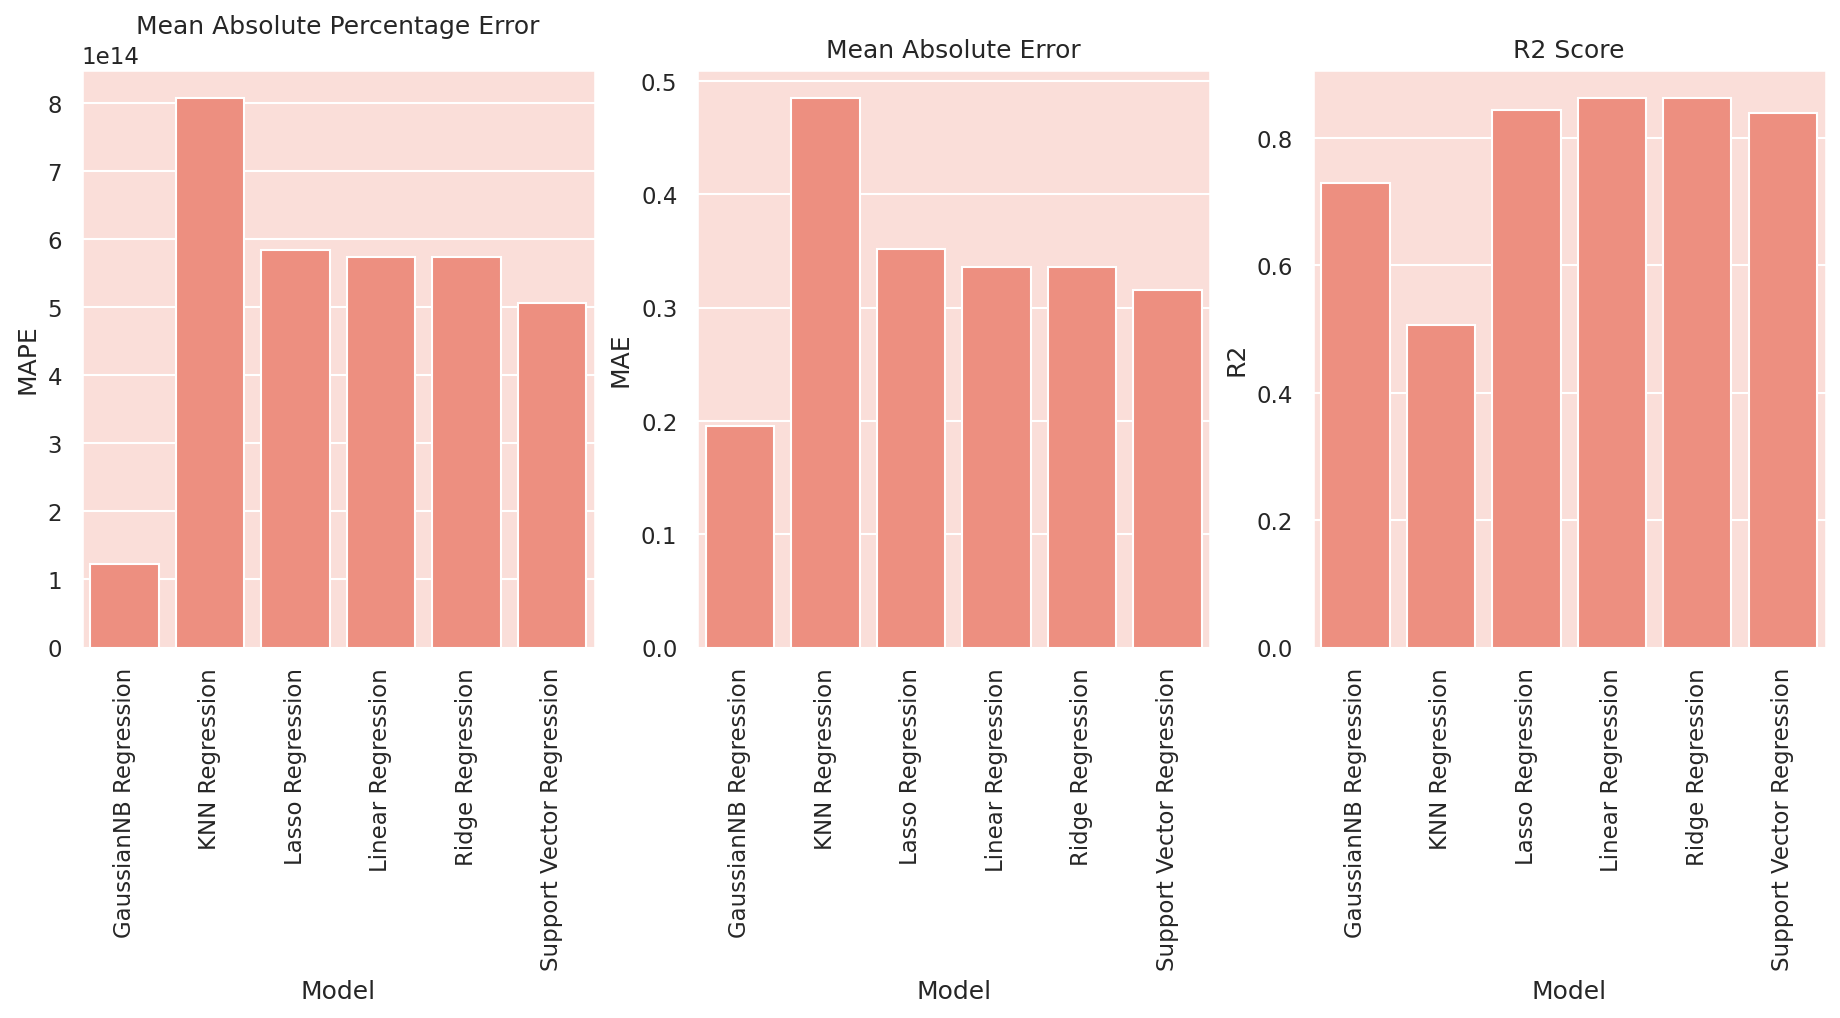

In [ ]:
# Make bar plots for the model performance metrics
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(data=metrics, x='Model', y='MAPE', color='#ff826e')
plt.xticks(rotation=90)
plt.title('Mean Absolute Percentage Error')
plt.subplot(1, 3, 2)
sns.barplot(data=metrics, x='Model', y='MAE', color='#ff826e')
plt.xticks(rotation=90)
plt.title('Mean Absolute Error')
plt.subplot(1, 3, 3)
sns.barplot(data=metrics, x='Model', y='R2', color='#ff826e')
plt.xticks(rotation=90)
plt.title('R2 Score')
plt.show()


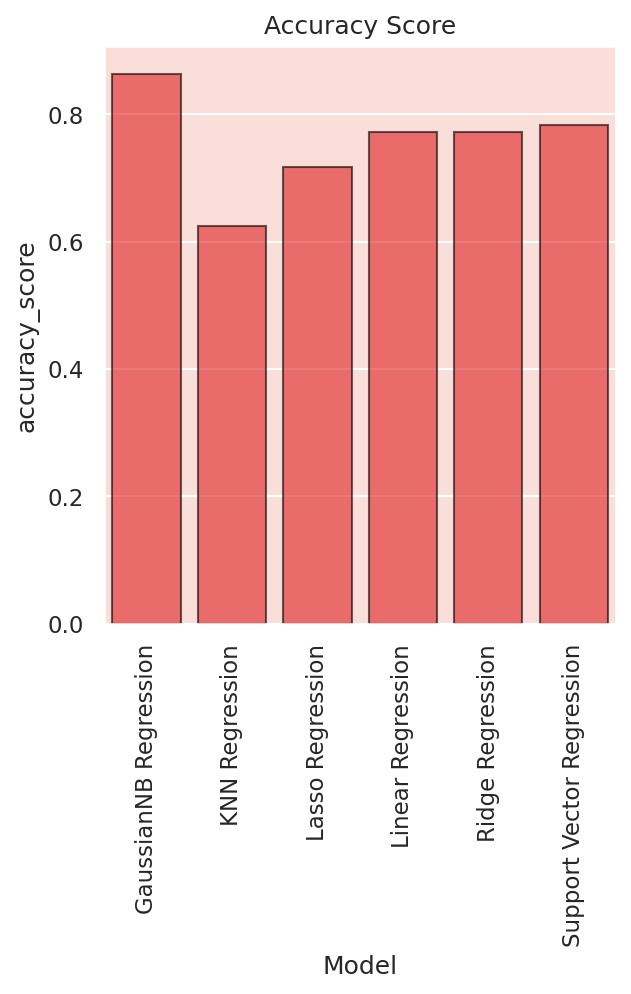

In [ ]:
# Make bar plot on accuracy score
plt.figure(figsize=(15,5 ))
plt.subplot(1, 3, 1)
sns.barplot(data=metrics, x='Model', y='accuracy_score', color='Red', alpha=0.6, edgecolor='black')
plt.xticks(rotation=90)
plt.title('Accuracy Score')
plt.show()

